In [34]:
# Import os
import os

# Import all required modules
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr
import streamlit as st



# Disable warnings
import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

Preparação

In [35]:
dados = pd.read_csv(r'C:/Users/mario/OneDrive/Analise BR 24/dados.csv')
print('Dataset size: ', dados.shape)
dados.head()

Dataset size:  (183, 111)


,period,homeTeam,awayTeam,rodada,data,away_Accurate passes,away_Aerial duels,away_Ball possession,away_Big chances,away_Big chances missed,away_Big chances scored,away_Big saves,away_Blocked shots,away_Clearances,away_Corner kicks,away_Dispossessed,away_Duels,away_Expected goals,away_Final third entries,away_Final third phase,away_Fouled in final third,away_Fouls,away_Free kicks,away_Goal kicks,away_Goalkeeper saves,away_Goals prevented,away_Ground duels,away_High claims,away_Hit woodwork,away_Interceptions,away_Offsides,away_Passes,away_Punches,away_Recoveries,away_Red cards,away_Shots inside box,away_Shots off target,away_Shots on target,away_Shots outside box,away_Tackles,away_Tackles won,away_Through balls,away_Throw-ins,away_Total saves,away_Total shots,away_Total tackles,away_Touches in penalty area,away_Yellow cards,home_Accurate passes,home_Aerial duels,home_Ball possession,home_Big chances,home_Big chances missed,home_Big chances scored,home_Big saves,home_Blocked shots,home_Clearances,home_Corner kicks,home_Dispossessed,home_Duels,home_Expected goals,home_Final third entries,home_Final third phase,home_Fouled in final third,home_Fouls,home_Free kicks,home_Goal kicks,home_Goalkeeper saves,home_Goals prevented,home_Ground duels,home_High claims,home_Hit woodwork,home_Interceptions,home_Offsides,home_Passes,home_Punches,home_Recoveries,home_Red cards,home_Shots inside box,home_Shots off target,home_Shots on target,home_Shots outside box,home_Tackles,home_Tackles won,home_Through balls,home_Throw-ins,home_Total saves,home_Total shots,home_Total tackles,home_Touches in penalty area,home_Yellow cards,away_Accurate passes_percentage,home_Accurate passes_percentage,away_Crosses_successful,away_Crosses_attempt,home_Crosses_successful,home_Crosses_attempt,away_crosses_percentage,home_crosses_percentage,away_Dribbles_successful,away_Dribbles_attempt,home_Dribbles_successful,home_Dribbles_attempt,away_Dribbles_percentage,home_Dribbles_percentage,away_Long balls_successful,away_Long balls_attempt,home_Long balls_successful,home_Long balls_attempt,away_Long balls_percentage,home_Long balls_percentage
0,1ST,Athletico,Cuiabá,1,2024-04-14,146,5/14 (36%),0.39,0,0,0,0,0,12,0,5,0.39,0.00,14,0,0,0,10,7,1,0.0,11/27 (41%),0,0,6,0,170,0,12,0,0,0,0,0,2,0.50,0,5,1,0,2,0,2,208,9/14 (64%),0.61,2,0,2,0,5,0,7,1,0.61,0.86,37,0,0,0,4,2,0,0.0,16/27 (59%),0,0,5,0,248,0,18,0,9,3,4,3,8,0.88,0,8,0,12,8,0,0,0.858824,0.838710,1,2,4,13,0.500000,0.307692,0,3,4,5,0.000000,0.800000,12,19,13,22,0.631579,0.590909
1,1ST,Athletico,Vasco da Gama,5,2024-05-05,108,9/18 (50%),0.35,0,0,0,0,0,18,2,5,0.44,0.00,20,0,1,0,5,9,2,0.0,11/27 (41%),0,0,4,2,143,0,14,1,0,0,0,0,5,0.80,0,7,2,0,5,0,0,218,9/18 (50%),0.65,3,2,1,0,3,8,3,3,0.56,1.65,28,0,2,0,6,0,1,0.0,16/27 (59%),0,3,3,2,251,0,21,0,7,7,3,6,6,0.67,0,9,1,13,6,0,0,0.755245,0.868526,0,4,5,17,0.000000,0.294118,1,2,4,6,0.500000,0.666667,13,27,9,18,0.481481,0.500000
2,1ST,Atlético Goianiense,Cruzeiro,6,2024-05-24,174,9/17 (53%),0.57,0,0,0,0,1,11,3,6,0.59,0.18,30,0,1,0,7,4,2,0.0,23/37 (62%),0,0,3,2,223,0,26,0,2,2,2,3,6,0.67,0,9,2,5,6,0,0,123,8/17 (47%),0.43,1,1,0,0,3,7,3,2,0.41,0.97,38,0,0,0,3,5,1,0.0,14/37 (38%),0,0,2,0,166,0,20,0,7,3,2,1,8,0.38,0,11,1,8,8,0,0,0.780269,0.740964,3,8,3,11,0.375000,0.272727,10,12,4,8,0.833333,0.500000,23,35,19,37,0.657143,0.513514
3,1ST,Atlético Goianiense,Flamengo,1,2024-04-14,159,8/13 (62%),0.57,0,0,0,0,1,11,1,4,0.52,0.16,24,0,3,0,7,4,2,0.0,17/35 (49%),0,0,2,0,197,0,22,0,2,2,1,2,4,0.75,0,8,2,4,4,0,1,106,5/13 (38%),0.43,1,1,0,0,1,7,3,2,0.48,0.65,20,0,1,0,6,4,0,0.0,18/35 (51%),0,0,1,1,139,0,24,1,5,4,2,2,7,0.57,0,8,0,7,7,0,4,0.807107,0.762590,0,4,4,13,0.000000,0.307692,6,9,5,7,0.666667,0.714286,13,28,3,19,0.464286,0.157895
4,1ST,Atlético Goianiense,São Paulo,3,2024-04-21,209,15/23 (65%),0.54,0,0,0,0,5,19,0,1,0.70,0.36,23,0,2,0,5,4,1,0.0,20/27 (74%),0,0,3,1,257,0,37,0,5,1,2,3,9,0.67,0,7,1,8,9,0,0,170,8/23 (35%),0.46,0,0,0,0,3,9,4,5,0.30,0.16,23,0,1,0,3,3,1,0.0,7/27 (26%),0,0,3,0,211,0,31,0,1,3,1,6,

In [36]:
def calcular_estatisticas_por_periodo(periodo):
    # Filtrar os dados para o período desejado
    if periodo == 'ALL':
        dados_periodo = dados
    else:
        dados_periodo = dados[dados['period'] == periodo]

    # Renomear a coluna 'homeTeam' para 'TeamName'
    dados_periodo = dados_periodo.rename(columns={'homeTeam': 'TeamName'})

    # Agrupe os dados pelo nome do time (TeamName) e calcule a média para cada coluna que começa com 'home_'
    home_team_stats = dados_periodo.groupby('TeamName').agg({'home_Accurate passes': 'sum',
                                                              'home_Ball possession': 'mean',
                                                              'home_Big chances': 'sum',
                                                              'home_Big chances missed': 'sum',
                                                              'home_Blocked shots': 'sum',
                                                              'home_Clearances': 'sum',
                                                              'home_Corner kicks': 'sum',
                                                              'home_Duels': 'mean',
                                                              'home_Expected goals': 'mean',
                                                              'home_Fouls': 'sum',
                                                              'home_Free kicks': 'sum',
                                                              'home_Goal kicks': 'sum',
                                                              'home_Goalkeeper saves': 'sum',
                                                              'home_Goals prevented': 'sum',
                                                              'home_Hit woodwork': 'sum',
                                                              'home_Interceptions': 'sum',
                                                              'home_Offsides': 'sum',
                                                              'home_Passes': 'sum',
                                                              'home_Red cards': 'sum',
                                                              'home_Shots inside box': 'sum',
                                                              'home_Shots off target': 'sum',
                                                              'home_Shots on target': 'sum',
                                                              'home_Shots outside box': 'sum',
                                                              'home_Tackles': 'sum',
                                                              'home_Tackles won': 'mean',
                                                              'home_Throw-ins': 'sum',
                                                              'home_Total shots': 'sum',
                                                              'home_Yellow cards': 'sum',
                                                              'home_Accurate passes_percentage': 'mean',
                                                              'home_Crosses_successful': 'sum',
                                                              'home_Crosses_attempt': 'sum',
                                                              'home_crosses_percentage': 'mean',
                                                              'home_Dribbles_successful': 'sum',
                                                              'home_Dribbles_attempt': 'sum',
                                                              'home_Dribbles_percentage': 'mean',
                                                              'home_Long balls_successful': 'sum',
                                                              'home_Long balls_attempt': 'sum',
                                                              'home_Long balls_percentage': 'mean'})
    
    return home_team_stats

# Calcular estatísticas para cada período

stats_all_home = calcular_estatisticas_por_periodo('ALL')


def rename_columns_without_prefix(dataframe, prefix):
    renamed_columns = {}
    for column in dataframe.columns:
        if column.strip().startswith(prefix):
            new_column_name = column[len(prefix):].strip()  # Remove o prefixo e espaços em branco
            renamed_columns[column] = new_column_name
    return dataframe.rename(columns=renamed_columns)

# Aplicando a função para renomear as colunas do DataFrame e atribuindo de volta ao DataFrame original
stats_all_home = rename_columns_without_prefix(stats_all_home, 'home_')


In [37]:
def calcular_estatisticas_por_periodo_away(periodo):
    # Filtrar os dados para o período desejado
    if periodo == 'ALL':
        dados_periodo = dados
    else:
        dados_periodo = dados[dados['period'] == periodo]

    # Renomear a coluna 'awayTeam' para 'TeamName'
    dados_periodo = dados_periodo.rename(columns={'awayTeam': 'TeamName'})

    # Agrupe os dados pelo nome do time visitante (TeamName) e calcule a média para cada coluna que começa com 'away_'
    away_team_stats = dados_periodo.groupby('TeamName').agg({'away_Accurate passes': 'sum',
                                                              'away_Ball possession': 'mean',
                                                              'away_Big chances': 'sum',
                                                              'away_Big chances missed': 'sum',
                                                              'away_Blocked shots': 'sum',
                                                              'away_Clearances': 'sum',
                                                              'away_Corner kicks': 'sum',
                                                              'away_Duels': 'mean',                                                              
                                                              'away_Expected goals': 'mean',
                                                              'away_Fouls': 'sum',
                                                              'away_Free kicks': 'sum',
                                                              'away_Goal kicks': 'sum',
                                                              'away_Goalkeeper saves': 'sum',
                                                              'away_Goals prevented': 'sum',
                                                              'away_Hit woodwork': 'sum',
                                                              'away_Interceptions': 'sum',
                                                              'away_Offsides': 'sum',
                                                              'away_Passes': 'sum',
                                                              'away_Red cards': 'sum',
                                                              'away_Shots inside box': 'sum',
                                                              'away_Shots off target': 'sum',
                                                              'away_Shots on target': 'sum',
                                                              'away_Shots outside box': 'sum',
                                                              'away_Tackles': 'sum',
                                                              'away_Tackles won': 'mean',                                                              
                                                              'away_Throw-ins': 'sum',
                                                              'away_Total shots': 'sum',
                                                              'away_Yellow cards': 'sum',
                                                              'away_Accurate passes_percentage': 'mean',
                                                              'away_Crosses_successful': 'sum',
                                                              'away_Crosses_attempt': 'sum',
                                                              'away_crosses_percentage': 'mean',
                                                              'away_Dribbles_successful': 'sum',
                                                              'away_Dribbles_attempt': 'sum',
                                                              'away_Dribbles_percentage': 'mean',
                                                              'away_Long balls_successful': 'sum',
                                                              'away_Long balls_attempt': 'sum',
                                                              'away_Long balls_percentage': 'mean'})
    
    return away_team_stats

# Calcular estatísticas para cada período para os times visitantes
stats_all_away = calcular_estatisticas_por_periodo_away('ALL')

# Aplicando a função para renomear as colunas do DataFrame e atribuindo de volta ao DataFrame original
stats_all_away = rename_columns_without_prefix(stats_all_away, 'away_')

In [38]:
# Concatenar os DataFrames de times da casa e visitantes ao longo do eixo das linhas
merged_stats_all = pd.concat([stats_all_home, stats_all_away])

In [39]:
# Calcular a média das colunas especificadas
mean_columns = ['Ball possession', 'Accurate passes_percentage', 'crosses_percentage', 'Dribbles_percentage', 'Long balls_percentage', 'Goals prevented', 'Expected goals', 'Duels', 'Tackles won']
mean_stats = merged_stats_all.groupby('TeamName')[mean_columns].mean()

# Somar as outras colunas
sum_stats = merged_stats_all.drop(mean_columns, axis=1).groupby('TeamName').sum()

# Concatenar os resultados
grouped_stats_all = pd.concat([sum_stats, mean_stats], axis=1)

grouped_stats_all = grouped_stats_all.reset_index()

# Opcionalmente, se você quer que TeamName seja a primeira coluna novamente, você pode fazer:
cols = ['TeamName'] + [col for col in grouped_stats_all.columns if col != 'TeamName']
grouped_stats_all = grouped_stats_all[cols]

grouped_stats_all

,TeamName,Accurate passes,Big chances,Big chances missed,Blocked shots,Clearances,Corner kicks,Fouls,Free kicks,Goal kicks,Goalkeeper saves,Hit woodwork,Interceptions,Offsides,Passes,Red cards,Shots inside box,Shots off target,Shots on target,Shots outside box,Tackles,Throw-ins,Total shots,Yellow cards,Crosses_successful,Crosses_attempt,Dribbles_successful,Dribbles_attempt,Long balls_successful,Long balls_attempt,Ball possession,Accurate passes_percentage,crosses_percentage,Dribbles_percentage,Long balls_percentage,Goals prevented,Expected goals,Duels,Tackles won
0,Athletico,4224,20,10,46,248,62,91,114,88,38,10,106,24,5090,2,96,76,60,86,200,206,182,32,48,206,104,186,336,604,0.524167,0.834050,0.209373,0.588525,0.570239,1.275,0.964583,0.510833,0.716250
1,Atlético Goianiense,3510,16,12,42,276,50,70,126,90,34,2,88,20,4346,8,82,48,40,48,150,218,130,42,52,216,68,154,338,660,0.418889,0.777346,0.293742,0.454402,0.499240,-0.195,0.637778,0.467778,0.543889
2,Atlético Mineiro,5742,28,16,56,170,82,89,144,54,18,0,126,30,6560,4,86,68,58,96,246,206,182,46,56,266,90,186,372,652,0.608333,0.865438,0.209819,0.482312,0.559449,-0.370,0.764444,0.540556,0.562778
3,Bahia,5164,28,16,44,274,58,77,200,104,58,6,128,24,6212,0,98,62,58,66,222,244,164,40,64,200,92,206,316,672,0.480972,0.819228,0.295054,0.461153,0.466403,-0.050,0.871389,0.503194,0.645417
4,Botafogo,5138,32,16,32,324,68,106,130,102,32,0,110,22,6106,2,84,66,56,70,216,250,154,50,62,210,90,160,390,720,0.509167,0.839009,0.271255,0.554927,0.562450,0.225,0.894306,0.457222,0.690278
5,Corinthians,4736,24,20,56,244,74,88,214,96,48,8,140,22,5834,0,122,96,68,98,170,326,220,38,84,302,120,228,358,708,0.515833,0.807419,0.299308,0.502394,0.508285,0.300,0.816250,0.487917,0.594861
6,Criciúma,2306,12,4,18,214,20,45,90,92,32,4,66,10,2856,0,48,34,36,40,104,118,88,30,34,92,84,156,206,408,0.400833,0.799690,0.402026,0.574513,0.507187,1.300,0.708333,0.455833,0.586667
7,Cruzeiro,4546,16,10,48,178,64,72,146,64,28,6,78,18,5380,4,82,48,56,70,196,200,152,30,46,216,100,168,286,538,0.528750,0.841067,0.214181,0.557508,0.539829,-0.910,0.707917,0.536250,0.604583
8,Cuiabá,2802,10,10,14,194,26,47,144,70,30,0,76,18,3426,0,50,42,16,22,140,138,72,30,34,140,62,108,208,432,0.393611,0.814441,0.279533,0.503869,0.489759,-0.395,0.403889,0.510556,0.714444
9,Flamengo,5594,26,12,66,226,102,85,236,80,26,6,108,14,6628,0,142,80,88,92,204,234,234,24,60,274,132,236,368,722,0.586667,0.833417,0.211438,0.545552,0.528334,-0.295,1.014444,0.543056,0.685139


In [40]:
tabela = pd.read_csv(r'C:/Users/mario/OneDrive/Analise BR 24/tabela.csv')
print('Dataset size: ', tabela.shape)
tabela

Dataset size:  (20, 9)


,team_names,Position,Points,MatchesPlayed,Wins,Draws,Losses,GoalsFor,GoalsAgainst
0,Flamengo,1,14,7,4,2,1,13,6
1,Bahia,2,14,7,4,2,1,10,7
2,Botafogo,3,13,7,4,1,2,13,7
3,São Paulo,4,13,7,4,1,2,12,6
4,Athletico,5,13,7,4,1,2,9,4
5,Red Bull Bragantino,6,12,7,3,3,1,9,6
6,Palmeiras,7,11,7,3,2,2,5,4
7,Internacional,8,10,5,3,1,1,5,3
8,Cruzeiro,9,10,6,3,1,2,8,9
9,Atlético Mineiro,10,10,6,2,4,0,10,4


In [41]:
# Calcular o aproveitamento de pontos
tabela['Aproveitamento'] = (tabela['Points'] / (tabela['MatchesPlayed'] * 3)) * 100

# Mostrar o DataFrame atualizado
tabela

,team_names,Position,Points,MatchesPlayed,Wins,Draws,Losses,GoalsFor,GoalsAgainst,Aproveitamento
0,Flamengo,1,14,7,4,2,1,13,6,66.666667
1,Bahia,2,14,7,4,2,1,10,7,66.666667
2,Botafogo,3,13,7,4,1,2,13,7,61.904762
3,São Paulo,4,13,7,4,1,2,12,6,61.904762
4,Athletico,5,13,7,4,1,2,9,4,61.904762
5,Red Bull Bragantino,6,12,7,3,3,1,9,6,57.142857
6,Palmeiras,7,11,7,3,2,2,5,4,52.380952
7,Internacional,8,10,5,3,1,1,5,3,66.666667
8,Cruzeiro,9,10,6,3,1,2,8,9,55.555556
9,Atlético Mineiro,10,10,6,2,4,0,10,4,55.555556


In [42]:
valor = pd.read_csv(r'C:/Users/mario/OneDrive/Analise BR 24/valores.csv')
print('Dataset size: ', tabela.shape)
valor

Dataset size:  (20, 10)


,team_names,avg_age,squad_value_euro
0,Palmeiras,"25,4",219950000.0
1,Flamengo,"26,0",165500000.0
2,Fluminense,"28,0",109950000.0
3,Corinthians,"24,8",109300000.0
4,Internacional,"27,9",95650000.0
5,São Paulo,"26,4",89850000.0
6,Atlético Mineiro,"26,0",86050000.0
7,Grêmio,"27,3",76000000.0
8,Red Bull Bragantino,"24,1",75400000.0
9,Botafogo,"26,9",69900000.0


In [43]:
# Suponha que 'grouped_stats_all' é o seu DataFrame com estatísticas
# e 'tabela' é o seu DataFrame com as posições dos times.

# Primeiro, certifique-se de que a coluna que contém os nomes dos times tenha o mesmo nome em ambos os DataFrames
grouped_stats_all = grouped_stats_all.rename(columns={'TeamName': 'team_names'})

# Agora, você pode fazer o merge dos DataFrames baseado na coluna dos nomes dos times
combined_data = pd.merge(grouped_stats_all, tabela, on='team_names')

# Agora, vamos fazer o merge com o DataFrame 'valor' com base no nome do time
combined_data = pd.merge(combined_data, valor, on='team_names')

# Exibir o DataFrame combinado
combined_data


,team_names,Accurate passes,Big chances,Big chances missed,Blocked shots,Clearances,Corner kicks,Fouls,Free kicks,Goal kicks,Goalkeeper saves,Hit woodwork,Interceptions,Offsides,Passes,Red cards,Shots inside box,Shots off target,Shots on target,Shots outside box,Tackles,Throw-ins,Total shots,Yellow cards,Crosses_successful,Crosses_attempt,Dribbles_successful,Dribbles_attempt,Long balls_successful,Long balls_attempt,Ball possession,Accurate passes_percentage,crosses_percentage,Dribbles_percentage,Long balls_percentage,Goals prevented,Expected goals,Duels,Tackles won,Position,Points,MatchesPlayed,Wins,Draws,Losses,GoalsFor,GoalsAgainst,Aproveitamento,avg_age,squad_value_euro
0,Athletico,4224,20,10,46,248,62,91,114,88,38,10,106,24,5090,2,96,76,60,86,200,206,182,32,48,206,104,186,336,604,0.524167,0.834050,0.209373,0.588525,0.570239,1.275,0.964583,0.510833,0.716250,5,13,7,4,1,2,9,4,61.904762,"25,2",66900000.0
1,Atlético Goianiense,3510,16,12,42,276,50,70,126,90,34,2,88,20,4346,8,82,48,40,48,150,218,130,42,52,216,68,154,338,660,0.418889,0.777346,0.293742,0.454402,0.499240,-0.195,0.637778,0.467778,0.543889,18,4,7,1,1,5,4,9,19.047619,"26,2",21750000.0
2,Atlético Mineiro,5742,28,16,56,170,82,89,144,54,18,0,126,30,6560,4,86,68,58,96,246,206,182,46,56,266,90,186,372,652,0.608333,0.865438,0.209819,0.482312,0.559449,-0.370,0.764444,0.540556,0.562778,10,10,6,2,4,0,10,4,55.555556,"26,0",86050000.0
3,Bahia,5164,28,16,44,274,58,77,200,104,58,6,128,24,6212,0,98,62,58,66,222,244,164,40,64,200,92,206,316,672,0.480972,0.819228,0.295054,0.461153,0.466403,-0.050,0.871389,0.503194,0.645417,2,14,7,4,2,1,10,7,66.666667,"28,3",60950000.0
4,Botafogo,5138,32,16,32,324,68,106,130,102,32,0,110,22,6106,2,84,66,56,70,216,250,154,50,62,210,90,160,390,720,0.509167,0.839009,0.271255,0.554927,0.562450,0.225,0.894306,0.457222,0.690278,3,13,7,4,1,2,13,7,61.904762,"26,9",69900000.0
5,Corinthians,4736,24,20,56,244,74,88,214,96,48,8,140,22,5834,0,122,96,68,98,170,326,220,38,84,302,120,228,358,708,0.515833,0.807419,0.299308,0.502394,0.508285,0.300,0.816250,0.487917,0.594861,17,5,7,1,2,4,3,6,23.809524,"24,8",109300000.0
6,Criciúma,2306,12,4,18,214,20,45,90,92,32,4,66,10,2856,0,48,34,36,40,104,118,88,30,34,92,84,156,206,408,0.400833,0.799690,0.402026,0.574513,0.507187,1.300,0.708333,0.455833,0.586667,16,5,5,1,2,2,9,9,33.333333,"28,1",15580000.0
7,Cruzeiro,4546,16,10,48,178,64,72,146,64,28,6,78,18,5380,4,82,48,56,70,196,200,152,30,46,216,100,168,286,538,0.528750,0.841067,0.214181,0.557508,0.539829,-0.910,0.707917,0.536250,0.604583,9,10,6,3,1,2,8,9,55.555556,"25,8",66800000.0
8,Cuiabá,2802,10,10,14,194,26,47,144,70,30,0,76,18,3426,0,50,42,16,22,140,138,72,30,34,140,62,108,208,432,0.393611,0.814441,0.279533,0.503869,0.489759,-0.395,0.403889,0.510556,0.714444,19,4,7,1,1,5,5,13,19.047619,"25,9",26700000.0
9,Flamengo,5594,26,12,66,226,102,85,236,80,26,6,108,14,6628,0,142,80,88,92,204,234,234,24,60,274,132,236,368,722,0.586667,0.833417,0.211438,0.545552,0.528334,-0.295,1.014444,0.543056,0.685139,1,14,7,4,2,1,13,6,66.666667,"26,0",165500000.0


In [44]:
combined_data['goals_diff'] = combined_data['GoalsFor'] - combined_data['GoalsAgainst']
combined_data['Accurate passes_per_game'] = combined_data['Accurate passes'] / combined_data['MatchesPlayed']
combined_data['passes_per_game'] = combined_data['Passes'] / combined_data['MatchesPlayed']
combined_data

,team_names,Accurate passes,Big chances,Big chances missed,Blocked shots,Clearances,Corner kicks,Fouls,Free kicks,Goal kicks,Goalkeeper saves,Hit woodwork,Interceptions,Offsides,Passes,Red cards,Shots inside box,Shots off target,Shots on target,Shots outside box,Tackles,Throw-ins,Total shots,Yellow cards,Crosses_successful,Crosses_attempt,Dribbles_successful,Dribbles_attempt,Long balls_successful,Long balls_attempt,Ball possession,Accurate passes_percentage,crosses_percentage,Dribbles_percentage,Long balls_percentage,Goals prevented,Expected goals,Duels,Tackles won,Position,Points,MatchesPlayed,Wins,Draws,Losses,GoalsFor,GoalsAgainst,Aproveitamento,avg_age,squad_value_euro,goals_diff,Accurate passes_per_game,passes_per_game
0,Athletico,4224,20,10,46,248,62,91,114,88,38,10,106,24,5090,2,96,76,60,86,200,206,182,32,48,206,104,186,336,604,0.524167,0.834050,0.209373,0.588525,0.570239,1.275,0.964583,0.510833,0.716250,5,13,7,4,1,2,9,4,61.904762,"25,2",66900000.0,5,603.428571,727.142857
1,Atlético Goianiense,3510,16,12,42,276,50,70,126,90,34,2,88,20,4346,8,82,48,40,48,150,218,130,42,52,216,68,154,338,660,0.418889,0.777346,0.293742,0.454402,0.499240,-0.195,0.637778,0.467778,0.543889,18,4,7,1,1,5,4,9,19.047619,"26,2",21750000.0,-5,501.428571,620.857143
2,Atlético Mineiro,5742,28,16,56,170,82,89,144,54,18,0,126,30,6560,4,86,68,58,96,246,206,182,46,56,266,90,186,372,652,0.608333,0.865438,0.209819,0.482312,0.559449,-0.370,0.764444,0.540556,0.562778,10,10,6,2,4,0,10,4,55.555556,"26,0",86050000.0,6,957.000000,1093.333333
3,Bahia,5164,28,16,44,274,58,77,200,104,58,6,128,24,6212,0,98,62,58,66,222,244,164,40,64,200,92,206,316,672,0.480972,0.819228,0.295054,0.461153,0.466403,-0.050,0.871389,0.503194,0.645417,2,14,7,4,2,1,10,7,66.666667,"28,3",60950000.0,3,737.714286,887.428571
4,Botafogo,5138,32,16,32,324,68,106,130,102,32,0,110,22,6106,2,84,66,56,70,216,250,154,50,62,210,90,160,390,720,0.509167,0.839009,0.271255,0.554927,0.562450,0.225,0.894306,0.457222,0.690278,3,13,7,4,1,2,13,7,61.904762,"26,9",69900000.0,6,734.000000,872.285714
5,Corinthians,4736,24,20,56,244,74,88,214,96,48,8,140,22,5834,0,122,96,68,98,170,326,220,38,84,302,120,228,358,708,0.515833,0.807419,0.299308,0.502394,0.508285,0.300,0.816250,0.487917,0.594861,17,5,7,1,2,4,3,6,23.809524,"24,8",109300000.0,-3,676.571429,833.428571
6,Criciúma,2306,12,4,18,214,20,45,90,92,32,4,66,10,2856,0,48,34,36,40,104,118,88,30,34,92,84,156,206,408,0.400833,0.799690,0.402026,0.574513,0.507187,1.300,0.708333,0.455833,0.586667,16,5,5,1,2,2,9,9,33.333333,"28,1",15580000.0,0,461.200000,571.200000
7,Cruzeiro,4546,16,10,48,178,64,72,146,64,28,6,78,18,5380,4,82,48,56,70,196,200,152,30,46,216,100,168,286,538,0.528750,0.841067,0.214181,0.557508,0.539829,-0.910,0.707917,0.536250,0.604583,9,10,6,3,1,2,8,9,55.555556,"25,8",66800000.0,-1,757.666667,896.666667
8,Cuiabá,2802,10,10,14,194,26,47,144,70,30,0,76,18,3426,0,50,42,16,22,140,138,72,30,34,140,62,108,208,432,0.393611,0.814441,0.279533,0.503869,0.489759,-0.395,0.403889,0.510556,0.714444,19,4,7,1,1,5,5,13,19.047619,"25,9",26700000.0,-8,400.285714,489.428571
9,Flamengo,5594,26,12,66,226,102,85,236,80,26,6,108,14,6628,0,142,80,88,92,204,234,234,24,60,274,132,236,368,722,0.586667,0.833417,0.211438,0.545552,0.528334,-0.295,1.014444,0.543056,0.685139,1,14,7,4,2,1,13,6,66.666667,"26,0",165500000.0,7,799.142857,946.857143


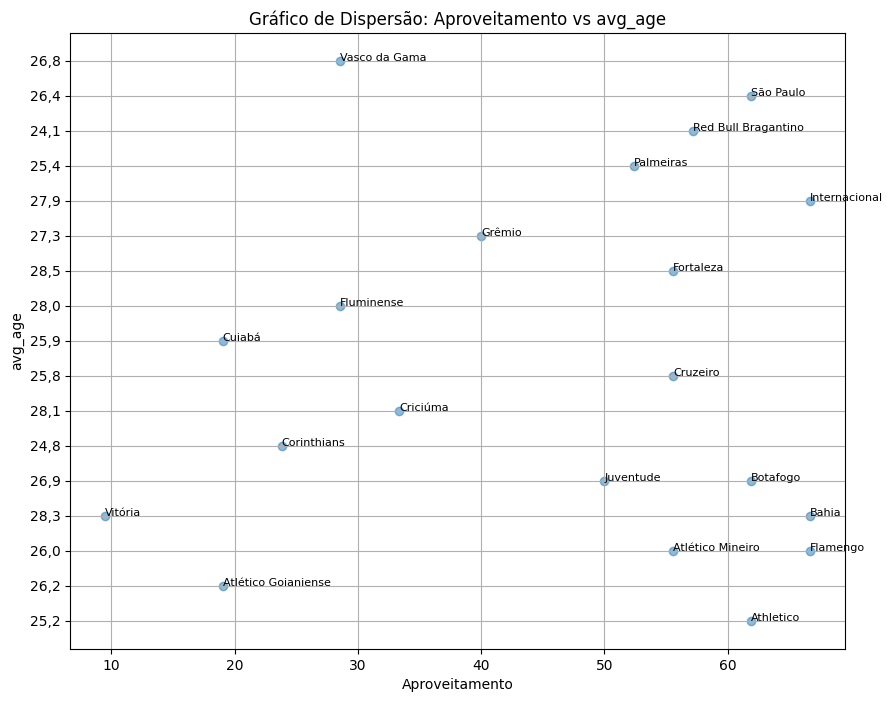

In [45]:
import matplotlib.pyplot as plt

# Selecionar as variáveis numéricas que você deseja comparar
x_variable = 'Aproveitamento'
y_variable = 'avg_age'

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 8))
plt.scatter(combined_data[x_variable], combined_data[y_variable], alpha=0.5)

# Adicionar os nomes dos times aos pontos do gráfico
for i, txt in enumerate(combined_data['team_names']):
    plt.text(combined_data[x_variable][i], combined_data[y_variable][i], txt, fontsize=8)

plt.title('Gráfico de Dispersão: {} vs {}'.format(x_variable, y_variable))
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.grid(True)
plt.show()


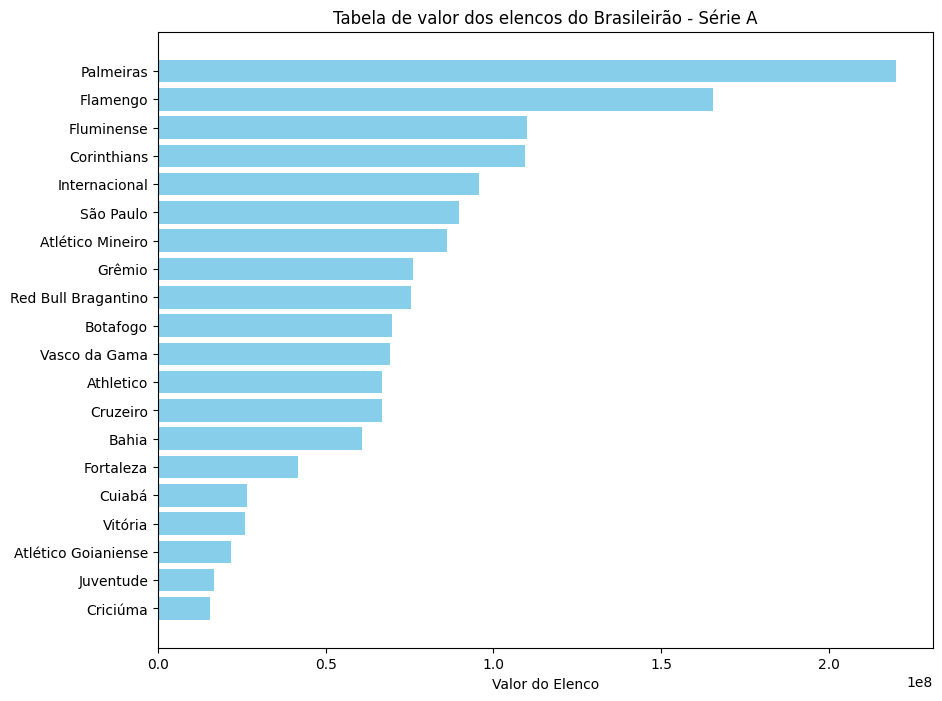

In [63]:
df_sorted = combined_data.sort_values(by="squad_value_euro", ascending=True)

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['team_names'], df_sorted['squad_value_euro'], color='skyblue')
plt.xlabel('Valor do Elenco')
plt.title('Tabela de valor dos elencos do Brasileirão - Série A')
plt.show()